`Programmed By : Rithik Tripathi`

[Connect with me on Linkedin](https://www.linkedin.com/in/rithik-tripathi-data-scientist/)

In this notebook, We will implement Logistic Regression and Understand how we can CHANGE THRESHOLD for classification

# Logistic Regression Demonstration

In [4]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("Dataset/KNN/data_cleaned.csv")
df.head()

# using Titanic Survival Dataset which has been already cleaned and encoded for usage

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Separating Independent & Target Features

In [6]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']
x.shape, y.shape

((891, 24), (891,))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=9, stratify=y)

x_train.shape, x_test.shape

((668, 24), (223, 24))

### Scaling Features 
using Min Max scalar

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x_scaled = scaler.fit_transform(x_train)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=x_train.columns)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.044986,0.032596,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.030254,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.258608,0.015127,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.233476,0.019852,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
test_x_scaled = scaler.transform(x_test)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=x_test.columns)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.648153,0.059532,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.296306,0.096626,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.346569,0.051822,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.585323,0.049943,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.258608,0.016461,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Implementing Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [26]:
# creating instance of Logictic Regression class
LogisticReg = LogisticRegression(max_iter=500)

# Training / Fitting the model
LogisticReg.fit(x_train, y_train)

LogisticRegression(max_iter=500)

##### We are aware of the fact that each feature has a coefficient associated with its equation. 
Lets check them out

In [28]:
pd.DataFrame({
    'Feature' : x_train.columns,
    'Coefficients' : LogisticReg.coef_.flatten()
}).sort_values(by = 'Coefficients')

,Feature,Coefficients
6,Sex_male,-1.291244
4,Pclass_3,-0.938834
10,SibSp_3,-0.899003
18,Parch_4,-0.801684
19,Parch_5,-0.698865
13,SibSp_8,-0.452825
12,SibSp_5,-0.232781
11,SibSp_4,-0.193704
23,Embarked_S,-0.159248
0,Age,-0.031875


> We could clearlt see that `Probability of Surviving` is Minimal with sex_male, 3rd class passangers and so on... (having smallest coefficient)
 and Maximum with sex_female, 1st class passangers and so on ... (having highest coefficient)

### Predictions

In [37]:
train_pred = LogisticReg.predict(x_train)
train_pred[:10]

# these are the hard tags for survival (sliced out only 10 predictions for better visibility)

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

##### Predicting over Train set

In [39]:
# calculating f1_score for train set
train_f1_score = f1_score(y_train, train_pred)
print('Training F1 Score : ',train_f1_score)

# remeber this score is with the default 50% Threshold

Training F1 Score :  0.7398373983739838


##### Predicting over Test set

In [40]:
test_pred = LogisticReg.predict(x_test)
test_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [42]:
# calculating f1_score for test set
test_f1_score = f1_score(test_pred, y_test)
print('Test F1 Score : ',test_f1_score)

# remeber this score is with the default 50% Threshold

Test F1 Score :  0.7349397590361445


###### We could say model is not overfitting here and the scores are descent enough

-----------------------------------------------------------------------------------------
#### As seen earlier in this notebook , the predictions predicted by .predict() are `Hard Tags`
#### In order to generate the `Soft Tags`, we will use .predict_proba()
---------


### Predicting Soft Tags 

In [53]:
train_pred_soft = LogisticReg.predict_proba(x_train)
train_pred_soft[:10]

# the output here is the COLUMNS equal to the number of CLASSES in TARGET
# and EACH COLUMN CONTAINS PROBABILITY OF THAT DATA POINT BELONGING TO THAT CLASS

# the below data shows the probability of each data point for 1st 10 records belonging to class 0 & 1 respectively

array([[0.16079452, 0.83920548],
       [0.21442751, 0.78557249],
       [0.35700362, 0.64299638],
       [0.33732195, 0.66267805],
       [0.8810176 , 0.1189824 ],
       [0.88812343, 0.11187657],
       [0.22680276, 0.77319724],
       [0.91303642, 0.08696358],
       [0.60869506, 0.39130494],
       [0.88404956, 0.11595044]])

In [51]:
# we can check and validiate the sum across the axis will always be 1 (total probability)
train_pred_soft.sum(axis=1)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### The best part about having probabilities is that we can set our own `Thresholds` to seggregate between classes

In [54]:
# seggeregating survived column from probabilities
train_pred_soft_survived = train_pred_soft[:, 1]
train_pred_soft_survived[:10]

array([0.83920548, 0.78557249, 0.64299638, 0.66267805, 0.1189824 ,
       0.11187657, 0.77319724, 0.08696358, 0.39130494, 0.11595044])

In [55]:
# setting up threshold of 0.55 and separating

for i in range(len(train_pred_soft_survived)):
    
    if(train_pred_soft_survived[i] > 0.55):
        train_pred_soft_survived[i] = 1
    else:
        train_pred_soft_survived[i] = 0

In [57]:
# checking how they look now
train_pred_soft_survived[:10]

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 0.])

In [59]:
# calculating F1 Score 

train_f1_score_soft = f1_score(y_train, train_pred_soft_survived)
print('Training F1 Score (soft) : ',train_f1_score_soft)

# remeber this score is with the custom 55% Threshold

# notice the change in accuracy

Training F1 Score (soft) :  0.7375


### Creating Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, log_loss

confusion_mat = confusion_matrix(y_test, test_pred)
print(confusion_mat)

[[118  19]
 [ 25  61]]


### Generating Classification Report

In [62]:
from sklearn.metrics import classification_report as report
print(report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       137
           1       0.76      0.71      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



### Visualizing the coefficients

In [63]:
LogisticReg.coef_

array([[-0.03187542,  0.00261003,  0.89636692,  0.05059092, -0.93883372,
         1.29936852, -1.2912444 ,  0.62758533,  0.79778733,  0.36106487,
        -0.89900305, -0.19370445, -0.23278051, -0.45282541,  0.17803249,
         0.57647513,  0.12804463,  0.62612123, -0.80168393, -0.69886542,
         0.        ,  0.16981082, -0.00243845, -0.15924825]])

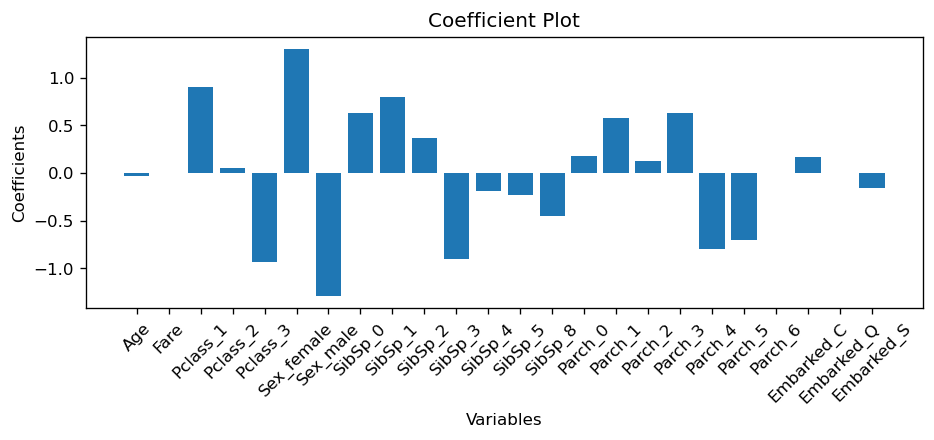

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,3), dpi=120, facecolor='w', edgecolor='b')
x = x_train.columns
y = LogisticReg.coef_.reshape(-1)
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')
plt.xticks(rotation = 45)
plt.show()